In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
import pathlib

from fastai import *
from fastai.vision import *

# os.listdir('drive/My Drive')

In [0]:
path = pathlib.Path.cwd()/'drive/My Drive'
# path.resolve()

In [7]:
dataset_dir = pathlib.Path.cwd()/'drive/My Drive/johnson_trump_dataset'
dataset_dir.cwd()
print(dataset_dir.exists())
print(dataset_dir.name)
# dataset_dir.resolve()
# print(path.exists())

# path2 = untar_data(path)

True
johnson_trump_dataset


In [8]:
# Print all of the files/directories in the CWD
# for d in dataset_dir.iterdir():
#     print(d)
bs = 64
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'
path_img = dataset_dir.cwd()/'drive/My Drive/johnson_trump_dataset'
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/content/drive/My Drive/johnson_trump_dataset/johnson_00000566.jpg'),
 PosixPath('/content/drive/My Drive/johnson_trump_dataset/johnson_00000271.jpg'),
 PosixPath('/content/drive/My Drive/johnson_trump_dataset/trump_00000002.jpg'),
 PosixPath('/content/drive/My Drive/johnson_trump_dataset/trump_00000665.jpg'),
 PosixPath('/content/drive/My Drive/johnson_trump_dataset/trump_00000046.jpg')]

In [9]:
'johnson_00000230.jpg' in fnames

False

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

In [0]:
# data.show_batch(rows=3, figsize=(7,6))

In [12]:
print(data.classes)
len(data.classes),data.c

['johnson', 'trump']


(2, 2)

In [13]:
learn  = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 47.5MB/s]


In [14]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
# Ignore any warnings that may come up
import warnings
warnings.filterwarnings("ignore")

In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.676434,0.318271,0.110000,06:20
1,0.469782,0.140988,0.033333,01:43
2,0.363059,0.149641,0.056667,01:39
3,0.295835,0.126420,0.050000,01:37


In [0]:
learn.save('stage-1')

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

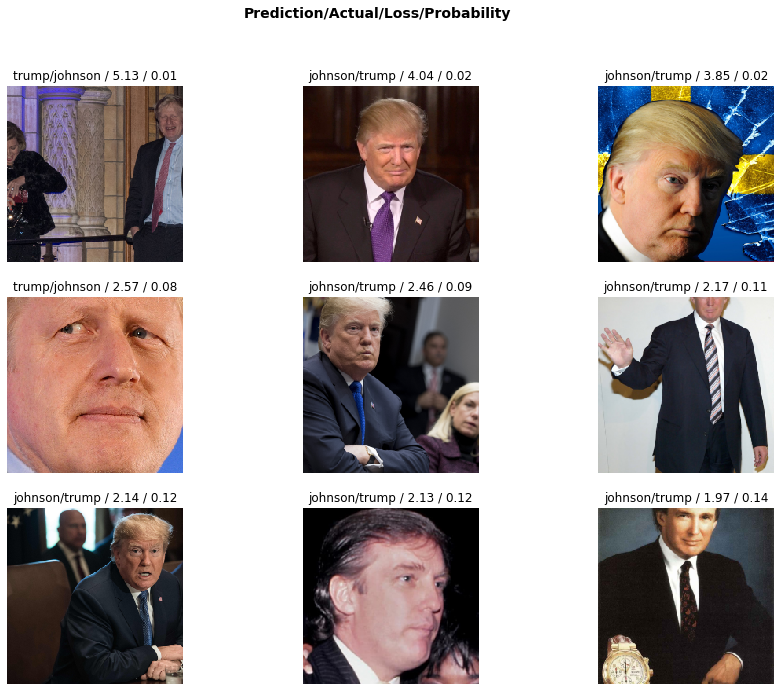

In [19]:
interp.plot_top_losses(9, figsize=(15,11))

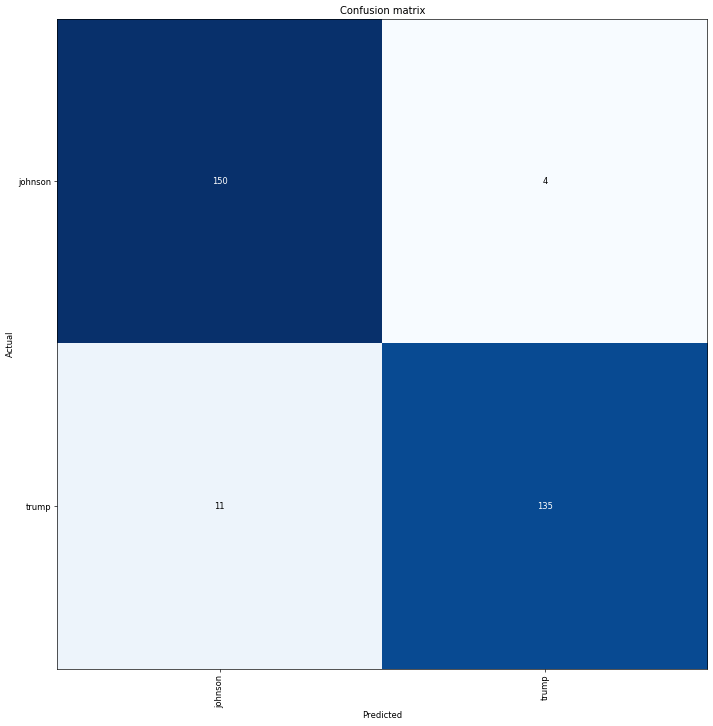

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [21]:
interp.most_confused(min_val=2)

[('trump', 'johnson', 11), ('johnson', 'trump', 4)]

In [0]:
learn.unfreeze()

In [23]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.271817,0.178269,0.050000,01:37


In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


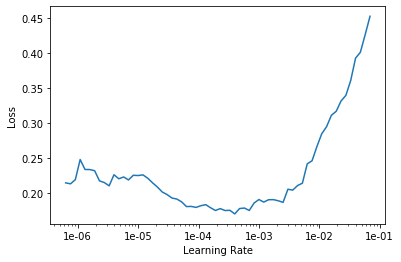

In [25]:
learn.recorder.plot()

In [26]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.222781,0.074038,0.026667,01:37
1,0.149925,0.064664,0.016667,01:38


In [0]:
learn.save('stage-1-34')

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

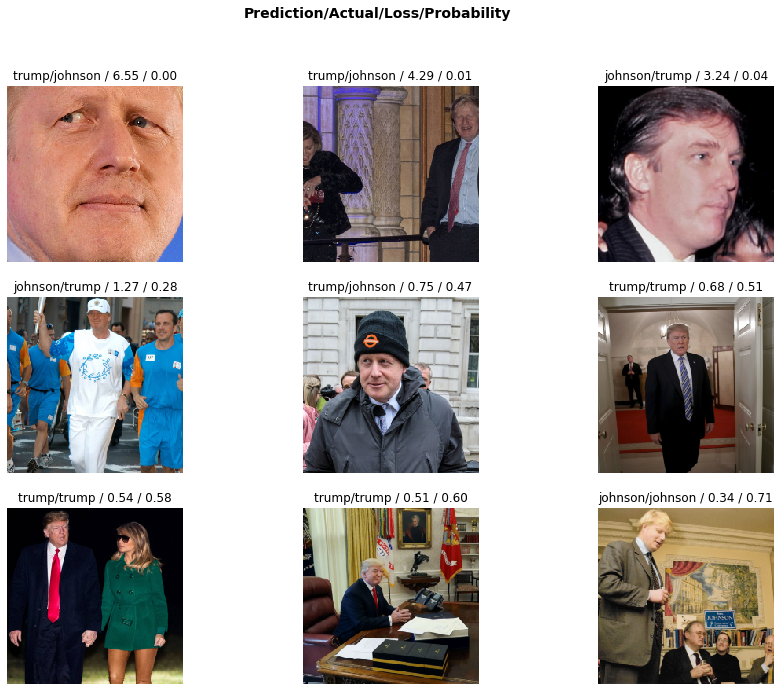

In [29]:
interp.plot_top_losses(9, figsize=(15,11))

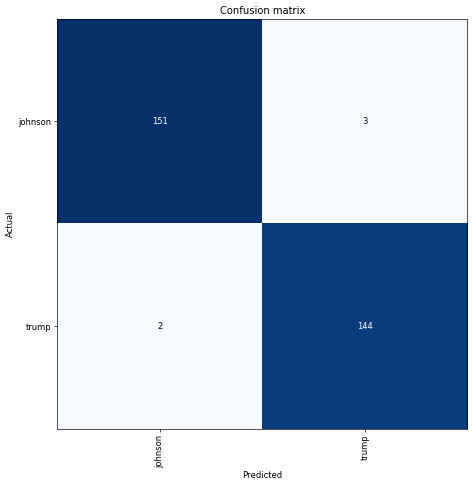

In [30]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

In [35]:
# save the learner
# learn.export()
learn.path

PosixPath('/content/drive/My Drive/johnson_trump_dataset')

In [37]:
!ls 'drive/My Drive/johnson_trump_dataset'

export.pkl	      johnson_00000642.jpg  trump_00000322.jpg
johnson_00000000.jpg  johnson_00000643.jpg  trump_00000324.jpg
johnson_00000001.jpg  johnson_00000644.jpg  trump_00000325.jpg
johnson_00000002.jpg  johnson_00000646.jpg  trump_00000326.jpg
johnson_00000003.jpg  johnson_00000647.jpg  trump_00000327.jpg
johnson_00000004.jpg  johnson_00000648.jpg  trump_00000329.jpg
johnson_00000005.jpg  johnson_00000649.jpg  trump_00000330.jpg
johnson_00000006.jpg  johnson_00000650.jpg  trump_00000331.jpg
johnson_00000007.jpg  johnson_00000651.jpg  trump_00000332.jpg
johnson_00000009.jpg  johnson_00000652.jpg  trump_00000333.jpg
johnson_00000010.jpg  johnson_00000653.jpg  trump_00000334.jpg
johnson_00000011.jpg  johnson_00000654.jpg  trump_00000335.jpg
johnson_00000012.jpg  johnson_00000655.jpg  trump_00000337.jpg
johnson_00000013.jpg  johnson_00000656.jpg  trump_00000338.jpg
johnson_00000014.jpg  johnson_00000658.jpg  trump_00000339.jpg
johnson_00000015.jpg  johnson_00000659.jpg  trump_00000341.j